## Project 2 - Animation

Will Russell
V00788739



### Overview

- This notebook serves to provide a glimpse into what is occurring during the training of a given perceptron on a dataset. The parameters are easily modified, and the methods guiding the functions are found in the project_code module. 
- We wanted to provide this as a means of visualizing what we talk about in the report regarding the modification of alpha values and the impact of soft vs hard activation functions on the delineation of the classification line. 
- As with all Jupyter Notebooks, care must be taken in execution of the cells to ensure that the associated variables have been set, as the application follows a serial execution pattern.
- The number of iterations and the desired alpha value can be set at the top of each block
- The animation should run for the number of iterations specified. 
    - *NOTE: The animation is a bit expensive and will sometimes get blocked if too many graphs are executed simultaneously*
- The data points displayed are those used to train the model, this is in contrast to the graphing in **project2_plotting.ipynb** which shows the data points used for testing (unless the train/test ratio == 1.0)



### Imports / Set Globals

In [1]:
from project_code.fileWorker import retrieve_students
import random
import numpy as np
import matplotlib.pyplot as plt
from project_code.data import normalize_student_data, separate_normalized_students, separate_and_normalize_students, train_set, split_set, tecalc
from project_code.perceptron import Perceptron
from project_code.graphlib import plot_normalized_data, plot_animated_data

%matplotlib notebook

# Retrieve the student data from a file
students = retrieve_students('./data.txt')
# Generate a normalized list of student data
student_list = normalize_student_data(students)

## Scenario A : Height Only

### Summary
- The following sections enable the user to create perceptron models based on the height of students.

In [2]:
student_height_list = [[x[0],x[2]] for x in student_list]
student_train = random.sample(student_height_list, 2000)

dimensions = 1
weights = [random.random() for i in range(dimensions+1)]
male_students, female_students = separate_normalized_students(student_train,gender_idx=dimensions)

<IPython.core.display.Javascript object>


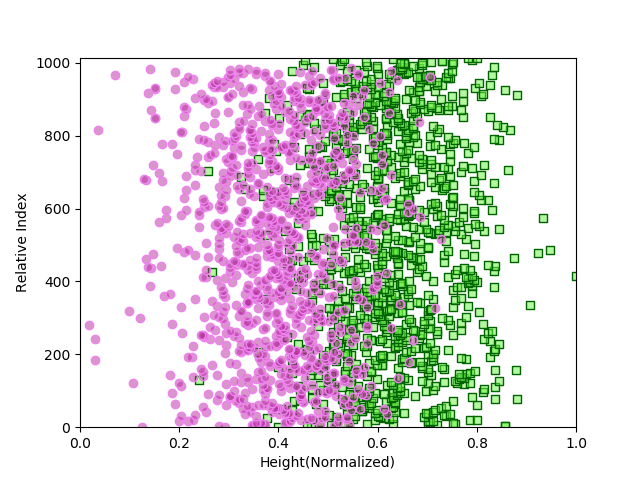

In [3]:
iterations = 1000
alpha = 0.1
p = Perceptron(ite=iterations, alpha=alpha)
hard_results = p.train(student_train, weights=weights, activation="hard")
fig4 = plt.figure("Scenario A: Height Only, Hard Activation, Alpha={}".format(alpha))
anim = plot_animated_data(fig4, male_students, female_students, hard_results,dimensions, iterations)
plt.show()


<IPython.core.display.Javascript object>


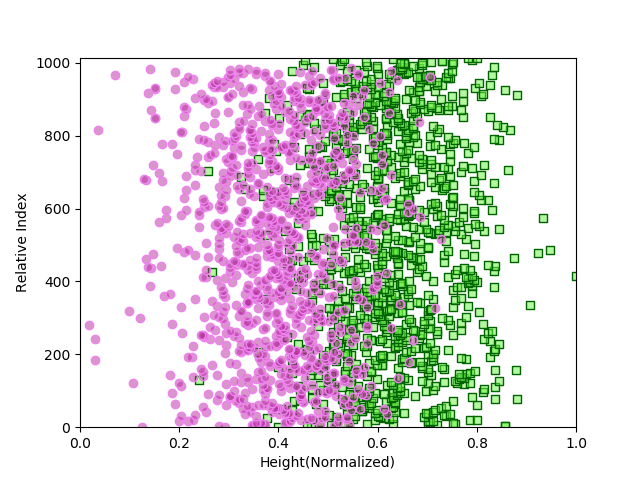

In [4]:
iterations = 100
alpha = 0.1
p = Perceptron(ite=iterations, alpha=alpha)
soft_results = p.train(student_train, weights=weights, activation="soft")
fig5 = plt.figure("Scenario A: Soft Activation, Alpha={}".format(alpha))
anim = plot_animated_data(fig5, male_students, female_students, soft_results,dimensions, iterations)
plt.show()


## Scenario B: Height and Weight

### Summary
- The following sections enable the user to create perceptron models based on the height and weight of students.

In [5]:
[x.append(False) for x in student_list]

student_train = [0 for x in range(3)] #stores the randomly sampled set
percentage = [0 for x in range(3)] #stores the percentage values set later
data_lists = [[0 for x in range(2)] for y in range(3)] #contains training and testing values for each percentage
male_students = [[0 for x in range(2)] for y in range(3)] #contains training and testing male values for each percentage
female_students = [[0 for x in range(2)] for y in range(3)] #contains training and testing female values for each percentage

dimensions = 2
weights = [random.random() for i in range(dimensions+1)]
percentage = [75, 50, 25] #set the percentage values

for i in range(0, 3): #fill in the training/test set array (data_lists), and male/female arrays.
    student_train[i] = train_set(student_list, percentage[i]) #create a random sample of values that are training based on percentage
    data_lists[i][0], data_lists[i][1] = split_set(student_train[i]) #return a training and testing set
    for j in range(0, 2):
        data_lists[i][j] = [x[0:-1] for x in data_lists[i][j]] #cleanup
        if j == 0:
            male_students[i][j], female_students[i][j] = separate_normalized_students(data_lists[i][j], gender_idx=dimensions) #create a male and female training set
        else:
            male_students[i][j], female_students[i][j] = separate_normalized_students(data_lists[i][j], gender_idx=dimensions) #create a male and female testing set

<IPython.core.display.Javascript object>


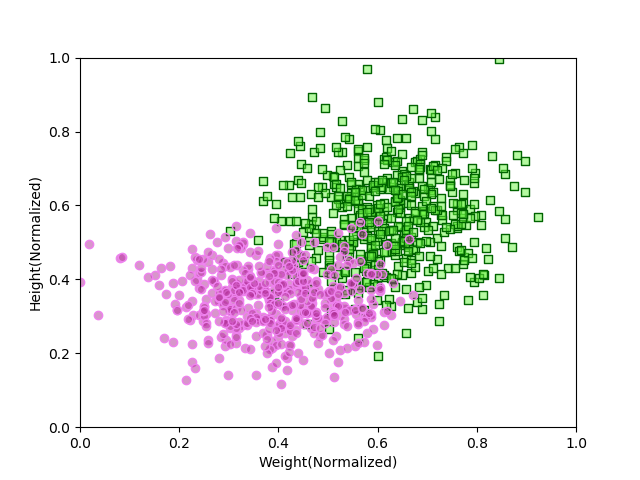

[[0.010242340807420484, 0], [0, 0], [0, 0]]


In [6]:
iterations = 100
alpha = 0.1
p = Perceptron(ite=iterations, alpha=alpha)
fig = plt.figure("Scenario B: Hard Activation, Alpha : {}".format(alpha))

results = [[[0 for x in range(2)] for y in range(2)] for z in range(3)]
total_error = [[0 for x in range(2)] for y in range(3)]

Percentage = 75 #change this to be one of the valid percentage values
Training = "hard" #change this to be hard or soft
#By default, the output graph is of the TRAINING SET. To view the graph of the TESTING SET,
#please uncomment the appropriate line for your indicated percentage value and training type,
#and comment out the animation currently in use. The line you are looking for looks like:
#"#anim = plot....."

if Percentage == 75:
    if Training == "hard":
        results[0][0][0] = p.train(data_lists[0][0], weights=weights, activation="hard") #training hard
        results[0][0][1] = p.train(data_lists[0][1], weights=(results[0][0][0])[0][1], activation="hard") #testing hard
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[0][0][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[0][0][0])[i][1])[j]
                weights_average[1][j] += ((results[0][0][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[0][0][0])
            weights_average[1][k] = weights_average[1][k]/len(results[0][0][1])
            
        
        total_error[0][0] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[0][1], female_students[0][1], results[0][0][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[0][1], female_students[0][1], results[0][0][1], dimensions, iterations)
    else: #soft
        results[0][1][0] = p.train(data_lists[0][0], weights=weights, activation="soft") #training soft
        results[0][1][1] = p.train(data_lists[0][1], weights=(results[0][1][0])[0][1], activation="soft") #testing soft
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[0][1][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[0][1][0])[i][1])[j]
                weights_average[1][j] += ((results[0][1][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[0][1][0])
            weights_average[1][k] = weights_average[1][k]/len(results[0][1][1])

        
        total_error[0][1] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[0][1], female_students[0][1], results[0][1][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[0][1], female_students[0][1], results[0][1][1], dimensions, iterations)
elif Percentage == 50:
    if Training == "hard":
        results[1][0][0] = p.train(data_lists[1][0], weights=weights, activation="hard") #training hard
        results[1][0][1] = p2.train(data_lists[1][1], weights=(results[1][0][0])[0][1], activation="hard") #testing hard
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[1][0][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[1][0][0])[i][1])[j]
                weights_average[1][j] += ((results[1][0][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[1][0][0])
            weights_average[1][k] = weights_average[1][k]/len(results[1][0][1])

        
        total_error[1][0] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[1][1], female_students[1][1], results[1][0][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[1][1], female_students[1][1], results[1][0][1], dimensions, iterations)
    else: #soft
        results[1][1][0] = p.train(data_lists[1][0], weights=weights, activation="soft") #training soft
        results[1][1][1] = p2.train(data_lists[1][1], weights=(results[1][1][0])[0][1], activation="soft") #testing soft
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[1][1][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[1][1][0])[i][1])[j]
                weights_average[1][j] += ((results[1][1][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[1][1][0])
            weights_average[1][k] = weights_average[1][k]/len(results[1][1][1])

        
        total_error[1][1] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[1][1], female_students[1][1], results[1][1][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[1][1], female_students[1][1], results[1][1][1], dimensions, iterations)
elif Percentage == 25:
    if Training == "hard":
        results[2][0][0] = p.train(data_lists[2][0], weights=weights, activation="hard") #training hard
        results[2][0][1] = p2.train(data_lists[2][1], weights=(results[2][0][0])[0][1], activation="hard") #testing hard
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[2][0][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[2][0][0])[i][1])[j]
                weights_average[1][j] += ((results[2][0][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[2][0][0])
            weights_average[1][k] = weights_average[1][k]/len(results[2][0][1])

        
        total_error[2][0] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[2][0], female_students[2][0], results[2][0][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[2][0], female_students[2][0], results[2][0][1], dimensions, iterations)
    else: #soft
        results[2][1][0] = p.train(data_lists[2][0], weights=weights, activation="soft") #training soft
        results[2][1][1] = p2.train(data_lists[2][1], weights=(results[2][1][0])[0][1], activation="soft") #testing soft
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[2][1][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[2][1][0])[i][1])[j]
                weights_average[1][j] += ((results[2][1][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[2][1][0])
            weights_average[1][k] = weights_average[1][k]/len(results[2][1][1])
            
        
        total_error[2][1] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[2][0], female_students[2][0], results[2][1][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[2][0], female_students[2][0], results[2][1][1], dimensions, iterations)

print(total_error)

<IPython.core.display.Javascript object>


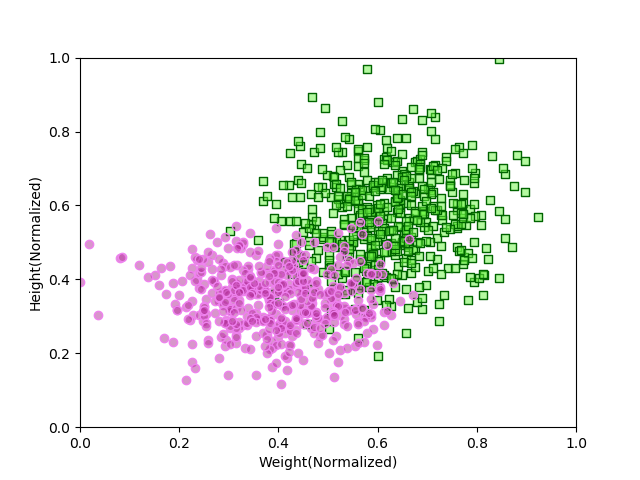

[[0.25708912740530765, 0], [0, 0], [0, 0]]


In [7]:
iterations = 100
alpha = 0.5
p = Perceptron(ite=iterations, alpha=alpha)
fig2 = plt.figure("Scenario B: Hard Activation, Alpha : {}".format(alpha))

results = [[[0 for x in range(2)] for y in range(2)] for z in range(3)]
total_error = [[0 for x in range(2)] for y in range(3)]

Percentage = 75 #change this to be one of the valid percentage values
Training = "hard" #change this to be hard or soft
#By default, the output graph is of the TRAINING SET. To view the graph of the TESTING SET,
#please uncomment the appropriate line for your indicated percentage value and training type,
#and comment out the animation currently in use. The line you are looking for looks like:
#"#anim = plot....."

if Percentage == 75:
    if Training == "hard":
        results[0][0][0] = p.train(data_lists[0][0], weights=weights, activation="hard") #training hard
        results[0][0][1] = p.train(data_lists[0][1], weights=(results[0][0][0])[0][1], activation="hard") #testing hard
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[0][0][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[0][0][0])[i][1])[j]
                weights_average[1][j] += ((results[0][0][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[0][0][0])
            weights_average[1][k] = weights_average[1][k]/len(results[0][0][1])
            
        
        total_error[0][0] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[0][1], female_students[0][1], results[0][0][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[0][1], female_students[0][1], results[0][0][1], dimensions, iterations)
    else: #soft
        results[0][1][0] = p.train(data_lists[0][0], weights=weights, activation="soft") #training soft
        results[0][1][1] = p.train(data_lists[0][1], weights=(results[0][1][0])[0][1], activation="soft") #testing soft
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[0][1][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[0][1][0])[i][1])[j]
                weights_average[1][j] += ((results[0][1][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[0][1][0])
            weights_average[1][k] = weights_average[1][k]/len(results[0][1][1])

        
        total_error[0][1] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[0][1], female_students[0][1], results[0][1][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[0][1], female_students[0][1], results[0][1][1], dimensions, iterations)
elif Percentage == 50:
    if Training == "hard":
        results[1][0][0] = p.train(data_lists[1][0], weights=weights, activation="hard") #training hard
        results[1][0][1] = p2.train(data_lists[1][1], weights=(results[1][0][0])[0][1], activation="hard") #testing hard
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[1][0][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[1][0][0])[i][1])[j]
                weights_average[1][j] += ((results[1][0][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[1][0][0])
            weights_average[1][k] = weights_average[1][k]/len(results[1][0][1])

        
        total_error[1][0] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[1][1], female_students[1][1], results[1][0][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[1][1], female_students[1][1], results[1][0][1], dimensions, iterations)
    else: #soft
        results[1][1][0] = p.train(data_lists[1][0], weights=weights, activation="soft") #training soft
        results[1][1][1] = p2.train(data_lists[1][1], weights=(results[1][1][0])[0][1], activation="soft") #testing soft
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[1][1][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[1][1][0])[i][1])[j]
                weights_average[1][j] += ((results[1][1][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[1][1][0])
            weights_average[1][k] = weights_average[1][k]/len(results[1][1][1])

        
        total_error[1][1] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[1][1], female_students[1][1], results[1][1][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[1][1], female_students[1][1], results[1][1][1], dimensions, iterations)
elif Percentage == 25:
    if Training == "hard":
        results[2][0][0] = p.train(data_lists[2][0], weights=weights, activation="hard") #training hard
        results[2][0][1] = p2.train(data_lists[2][1], weights=(results[2][0][0])[0][1], activation="hard") #testing hard
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[2][0][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[2][0][0])[i][1])[j]
                weights_average[1][j] += ((results[2][0][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[2][0][0])
            weights_average[1][k] = weights_average[1][k]/len(results[2][0][1])

        
        total_error[2][0] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[2][0], female_students[2][0], results[2][0][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[2][0], female_students[2][0], results[2][0][1], dimensions, iterations)
    else: #soft
        results[2][1][0] = p.train(data_lists[2][0], weights=weights, activation="soft") #training soft
        results[2][1][1] = p2.train(data_lists[2][1], weights=(results[2][1][0])[0][1], activation="soft") #testing soft
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[2][1][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[2][1][0])[i][1])[j]
                weights_average[1][j] += ((results[2][1][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[2][1][0])
            weights_average[1][k] = weights_average[1][k]/len(results[2][1][1])
            
        
        total_error[2][1] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[2][0], female_students[2][0], results[2][1][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[2][0], female_students[2][0], results[2][1][1], dimensions, iterations)

print(total_error)

<IPython.core.display.Javascript object>


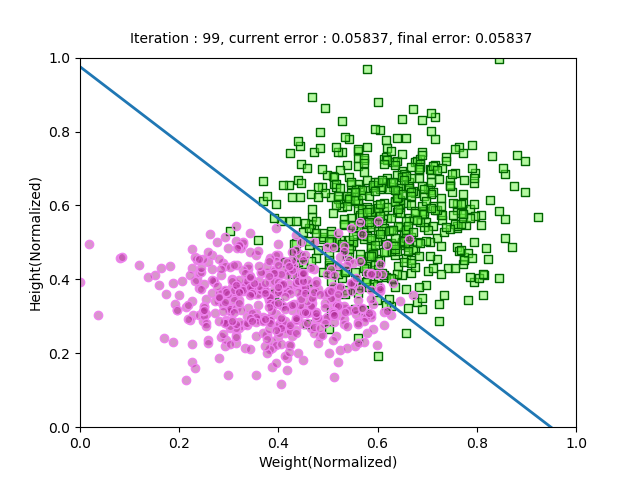

[[0, 12.894813307815859], [0, 0], [0, 0]]


In [8]:
iterations = 100
alpha = 0.1
p = Perceptron(ite=iterations, alpha=alpha)
fig3 = plt.figure("Scenario B : Soft Activation, alpha={}".format(alpha))

results = [[[0 for x in range(2)] for y in range(2)] for z in range(3)]
total_error = [[0 for x in range(2)] for y in range(3)]
weights = [0.,0.,0.]

Percentage = 75 #change this to be one of the valid percentage values
Training = "soft" #change this to be hard or soft
#By default, the output graph is of the TRAINING SET. To view the graph of the TESTING SET,
#please uncomment the appropriate line for your indicated percentage value and training type,
#and comment out the animation currently in use. The line you are looking for looks like:
#"#anim = plot....."

if Percentage == 75:
    if Training == "hard":
        results[0][0][0] = p.train(data_lists[0][0], weights=weights, activation="hard") #training hard
        results[0][0][1] = p.train(data_lists[0][1], weights=(results[0][0][0])[0][1], activation="hard") #testing hard
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[0][0][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[0][0][0])[i][1])[j]
                weights_average[1][j] += ((results[0][0][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[0][0][0])
            weights_average[1][k] = weights_average[1][k]/len(results[0][0][1])
            
        
        total_error[0][0] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[0][1], female_students[0][1], results[0][0][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[0][1], female_students[0][1], results[0][0][1], dimensions, iterations)
    else: #soft
        results[0][1][0] = p.train(data_lists[0][0], weights=weights, activation="soft") #training soft
        results[0][1][1] = p.train(data_lists[0][1], weights=(results[0][1][0])[0][1], activation="soft") #testing soft
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[0][1][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[0][1][0])[i][1])[j]
                weights_average[1][j] += ((results[0][1][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[0][1][0])
            weights_average[1][k] = weights_average[1][k]/len(results[0][1][1])

        
        total_error[0][1] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[0][1], female_students[0][1], results[0][1][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[0][1], female_students[0][1], results[0][1][1], dimensions, iterations)
elif Percentage == 50:
    if Training == "hard":
        results[1][0][0] = p.train(data_lists[1][0], weights=weights, activation="hard") #training hard
        results[1][0][1] = p2.train(data_lists[1][1], weights=(results[1][0][0])[0][1], activation="hard") #testing hard
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[1][0][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[1][0][0])[i][1])[j]
                weights_average[1][j] += ((results[1][0][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[1][0][0])
            weights_average[1][k] = weights_average[1][k]/len(results[1][0][1])

        
        total_error[1][0] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[1][1], female_students[1][1], results[1][0][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[1][1], female_students[1][1], results[1][0][1], dimensions, iterations)
    else: #soft
        results[1][1][0] = p.train(data_lists[1][0], weights=weights, activation="soft") #training soft
        results[1][1][1] = p2.train(data_lists[1][1], weights=(results[1][1][0])[0][1], activation="soft") #testing soft
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[1][1][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[1][1][0])[i][1])[j]
                weights_average[1][j] += ((results[1][1][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[1][1][0])
            weights_average[1][k] = weights_average[1][k]/len(results[1][1][1])

        
        total_error[1][1] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[1][1], female_students[1][1], results[1][1][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[1][1], female_students[1][1], results[1][1][1], dimensions, iterations)
elif Percentage == 25:
    if Training == "hard":
        results[2][0][0] = p.train(data_lists[2][0], weights=weights, activation="hard") #training hard
        results[2][0][1] = p2.train(data_lists[2][1], weights=(results[2][0][0])[0][1], activation="hard") #testing hard
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[2][0][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[2][0][0])[i][1])[j]
                weights_average[1][j] += ((results[2][0][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[2][0][0])
            weights_average[1][k] = weights_average[1][k]/len(results[2][0][1])

        
        total_error[2][0] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[2][0], female_students[2][0], results[2][0][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[2][0], female_students[2][0], results[2][0][1], dimensions, iterations)
    else: #soft
        results[2][1][0] = p.train(data_lists[2][0], weights=weights, activation="soft") #training soft
        results[2][1][1] = p2.train(data_lists[2][1], weights=(results[2][1][0])[0][1], activation="soft") #testing soft
        
        weights_average = [[0 for x in range(3)]for y in range(2)];
        for i in range(0,len(results[2][1][0])):
            for j in range(0,3):
                weights_average[0][j] += ((results[2][1][0])[i][1])[j]
                weights_average[1][j] += ((results[2][1][1])[i][1])[j]
        for k in range(0,3):
            weights_average[0][k] = weights_average[0][k]/len(results[2][1][0])
            weights_average[1][k] = weights_average[1][k]/len(results[2][1][1])
            
        
        total_error[2][1] = tecalc(weights_average[0], weights_average[1])
        anim = plot_animated_data(fig, male_students[2][0], female_students[2][0], results[2][1][0], dimensions, iterations)
        #anim = plot_animated_data(fig, male_students[2][0], female_students[2][0], results[2][1][1], dimensions, iterations)

print(total_error)